
## **Curse of Dimensionality**

#### Burak Firat
#### Hildebrand Department of Petroleum and Geosystem Engineering, The University of Texas at Austin

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences

_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Elnara Rustamzade, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/elnara-rustamzade/)


### **Executive Summary**
As geoscientists, we engage with big data, characterized by its big volume and diverse types. However, this complexity introduces the challenge known as *the curse of dimensionality*. To grasp this concept, it's essential to first understand what high-dimensional space means. When we design machine learning models that contain multiple features, we are essentially operating within a high-dimensional space. Unfortunately, working in such environments presents several challenges, including:  
1. Classifier Performance 
2. Difficulties in visualization  
3. Overfitting issues  
4. Distorted feature space

My goal here is to outline these challenges through various case scenarios. To begin, we will import the necessary packages.
### **Import Packages**

The following functions will be used in the workflow.

In [379]:
import numpy as np                                            # ndarrays for gridded data
import pandas as pd                                           # DataFrames for tabular data
import matplotlib.pyplot as plt                               # for plotting
import random                                                 # for random numbers
from scipy import linalg                                      # for linear regression
from sklearn.datasets import make_classification              # to make classification
from sklearn.neighbors import KNeighborsClassifier            # for KNeighbors Classification
from sklearn.linear_model import LogisticRegression           # to Logistic Regression
from sklearn.model_selection import train_test_split          # to easily seperate data
from sklearn.metrics import accuracy_score                    # to make a comparison
from sklearn.metrics import pairwise_distances                # to calculate pairwise distance
from sklearn.decomposition import PCA                         # for dimension reduction
plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
seed = 42                                                     # random number seed 

### **About Data**

The data sets consist of randomly generated synthetic data for each scenario. Additionally, only the final case has a function, so I prefer not to create a separate subtitle for Functions.

#### **1. Classifier Performance**
The Hughes Phenomenon indicates that as the number of features increases, the performance of classifiers tends to decline, particularly in high-dimensional spaces [1]. When irrelevant features are introduced while maintaining a constant sample size, the level of noise increases, leading to overfitting of the model. Consequently, certain models, such as K-nearest Neighbors (KNN), may not be effective due to the diminished relevance of distance metrics when classifying neighboring points.

So, initially, we will perform neighbor classification by importing the make_classification and KNeighborsClassifier packages from the sklearn library. Subsequently, we will import accuracy_score from sklearn to evaluate the model's accuracy. Let's see how classifier performance will get affected in high dimensional space.


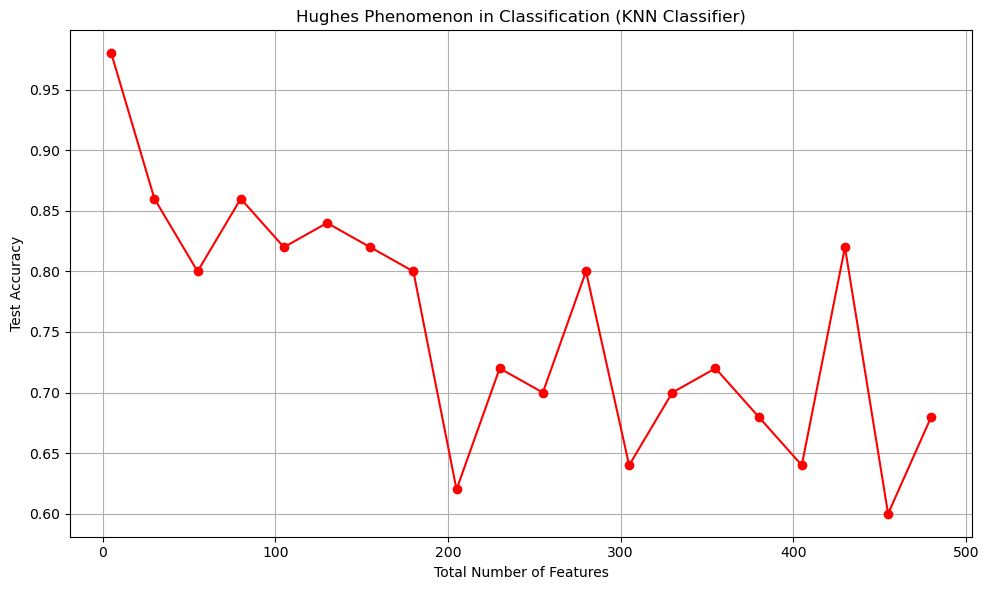

In [404]:
# Parameters
n_samples = 200
n_informative = 5
n_classes = 2
random_state = 42
feature_counts = np.arange(5, 501, 25)  # Total number of features (increasing)
test_accuracies = []

# Loop over increasing total features
for n_features in feature_counts:
    X, y = make_classification(n_samples=n_samples,
                               n_features=n_features,
                               n_informative=n_informative,
                               n_redundant=0,
                               n_repeated=0,
                               n_classes=n_classes,
                               n_clusters_per_class=1,
                               flip_y=0.01,
                               class_sep=1.0,
                               random_state=random_state)

    # Testing and training split
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.25,
                                                        random_state=random_state)
    
    # K-Nearest Neighbors classifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Test accuracy
    acc = accuracy_score(y_test, y_pred)
    test_accuracies.append(acc)

# Plots
plt.figure(figsize=(10, 6))
plt.plot(feature_counts, test_accuracies, marker='o', color='red')
plt.xlabel('Total Number of Features')
plt.ylabel('Test Accuracy')
plt.title('Hughes Phenomenon in Classification (KNN Classifier)')
plt.grid(True)
plt.tight_layout()
plt.show()


The graph clearly illustrates the Hughes Phenomenon. It demonstrates that as we introduce additional features while maintaining a constant sample size, the accuracy of the test will decline.

#### **2. Difficulties in Visualization**

Human beings are capable of visualizing a maximum of three dimensions, but visualizing ten dimensions is beyond our capability. To address this, we often employ techniques like Principal Component Analysis (PCA) for feature reduction[2]. However, even after successfully reducing the dimensions, the resulting graph may still lack clarity.

When we compress ten dimensions down to two, we inevitably lose some structural information in the process. This loss complicates the interpretation of clusters and makes decision boundaries less distinct. Therefore, it's important to recognize that increasing dimensions does not necessarily lead to improved understanding or performance.

The code provided below will generate two sets of features: one with two features and another with one hundred, while maintaining the same number of samples. We will apply Principal Component Analysis to reduce the feature count and then compare the outcomes.

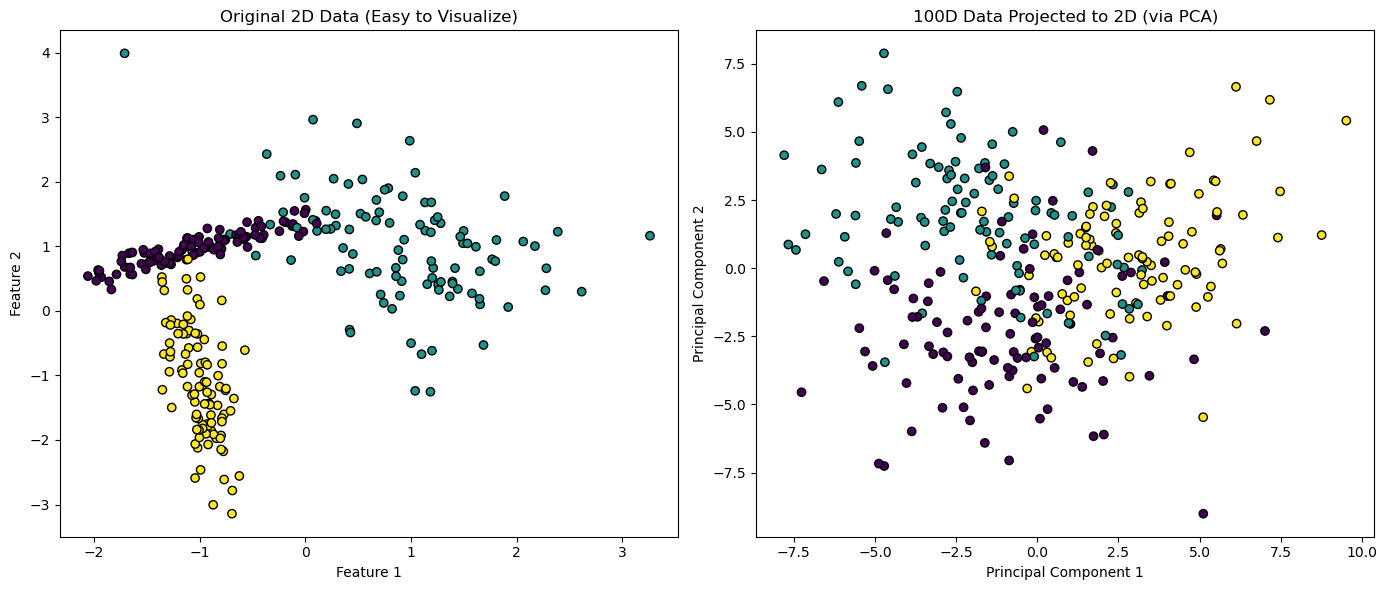

In [408]:
# Parameters
n_samples = 300
n_classes = 3
random_state = 42

# 2D Data 
X_2D, y_2D = make_classification(n_samples=n_samples,
                                 n_features=2,
                                 n_informative=2,
                                 n_redundant=0,
                                 n_classes=n_classes,
                                 n_clusters_per_class=1,
                                 random_state=random_state)

# 100D Data
X_highD, y_highD = make_classification(n_samples=n_samples,
                                       n_features=100,
                                       n_informative=10,
                                       n_redundant=0,
                                       n_classes=n_classes,
                                       n_clusters_per_class=1,
                                       random_state=random_state)

# Reduce 100D to 2D using PCA
pca = PCA(n_components=2)
X_highD_pca = pca.fit_transform(X_highD)

# Plots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Original 2D data
axs[0].scatter(X_2D[:, 0], X_2D[:, 1], c=y_2D, cmap='viridis', edgecolor='k')
axs[0].set_title("Original 2D Data (Easy to Visualize)")
axs[0].set_xlabel("Feature 1")
axs[0].set_ylabel("Feature 2")

# PCA-reduced 2D (100D data)
axs[1].scatter(X_highD_pca[:, 0], X_highD_pca[:, 1], c=y_highD, cmap='viridis', edgecolor='k')
axs[1].set_title("100D Data Projected to 2D (via PCA)")
axs[1].set_xlabel("Principal Component 1")
axs[1].set_ylabel("Principal Component 2")

plt.tight_layout()
plt.show()


The first graph is more clear and easier to interpret regarding the clusters and their boundaries. In contrast, the same cannot be said for the second graph, even though the 100-dimensional data has been reduced using PCA. Additionally, the second graph fails to represent all the relationships that exist in the original 100-dimensional space.

#### **3. Overfitting Issues**
One of the challenges associated with high dimensionality is the problem of overfitting. When a model has an excessive number of features, it becomes more complex and sparse. As the model attempts to account for all these random features, it essentially turns into a whole noise. This results in a model that performs poorly when faced with new datasets.

When we divide the data into training and testing sets, there will be significant overlap with the training data, but the model is likely to underperform on the testing data. To illustrate this, I have included some code below. We will first separate the data into testing and training sets, then apply logistic regression until we reach 500 features. Let’s take a look at what is going on.

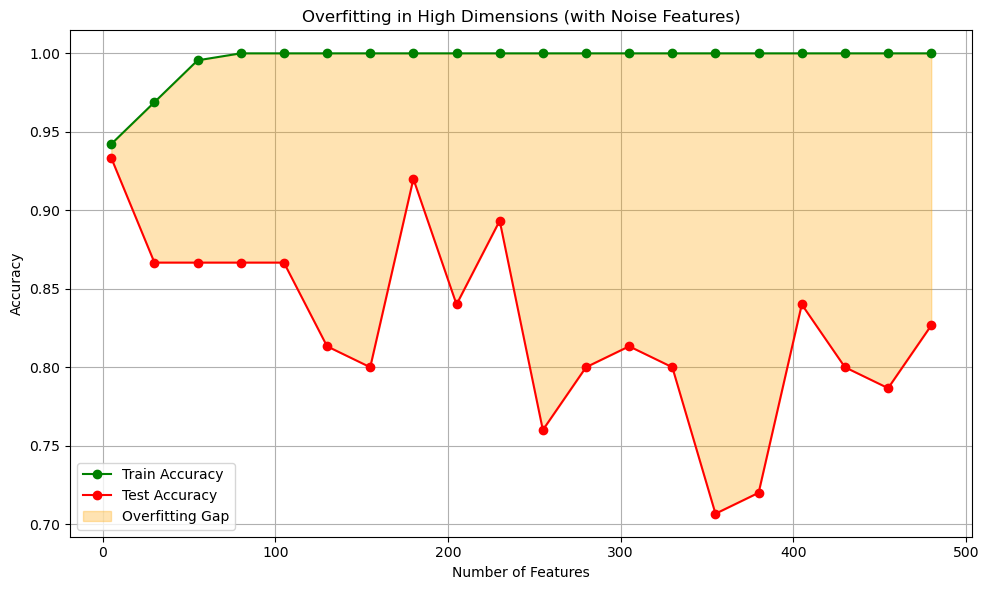

In [412]:
# Parameters
n_samples = 300
n_informative = 5  # Let it be low to assume more noise in the dataset. I'm fully aware of exaggerating the case. 
n_total_features = 500
random_state = 42
step = 25

# Base dataset
X_base, y = make_classification(n_samples=n_samples,
                                 n_features=n_informative,
                                 n_informative=n_informative,
                                 n_redundant=0,
                                 n_classes=2,
                                 random_state=random_state,
                                 flip_y=0.01,
                                 class_sep=1.5)

# Testing and training split
X_train_base, X_test_base, y_train, y_test = train_test_split(
    X_base, y, test_size=0.25, random_state=random_state)

# Creating lists
train_acc = []
test_acc = []
feature_counts = np.arange(n_informative, n_total_features + 1, step)

for n_features in feature_counts:
    # Add noise features (same for train/test)
    n_noise = n_features - n_informative
    noise_train = np.random.randn(X_train_base.shape[0], n_noise)
    noise_test = np.random.randn(X_test_base.shape[0], n_noise)

    X_train = np.hstack([X_train_base, noise_train])
    X_test = np.hstack([X_test_base, noise_test])

    #logistic regression
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)

    train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)))

# Plots
plt.figure(figsize=(10, 6))
plt.plot(feature_counts, train_acc, label='Train Accuracy', color='green', marker='o')
plt.plot(feature_counts, test_acc, label='Test Accuracy', color='red', marker='o')
plt.fill_between(feature_counts, test_acc, train_acc, color='orange', alpha=0.3, label='Overfitting Gap')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Overfitting in High Dimensions (with Noise Features)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The graphs indicate that as the number of features increases, training accuracy will achieve 100%. However, test accuracy declines, suggesting that the model is memorizing the training data rather than generalizing effectively, which is a clear case of overfitting. This illustrates how excessive model capacity in high-dimensional space results in a perfect fit but poor performance, representing the Hughes phenomenon again alongside overfitting.

#### **4. Distorted Feature Space**
In high-dimensional spaces, data points can lose their meaningful distance relationships. The graph[4] below illustrates that the distance between randomly selected black and blue points in 2D differs significantly from the distance between the same points in 3D. Consequently, in certain Machine Learning models that rely on distance, like KNN, this distortion can mislead the model and lead to completely inaccurate outcomes.

To bolster my point, please examine the code provided below. In this scenario, I generated two distinct datasets again while keeping the sample size constant. However, one dataset contains 2 features, while the other has 100 features. We need to perform dimensionality reduction, so I applied PCA to this dataset. Next, we will compare the mean and standard deviation of the two datasets. Let's take a look.

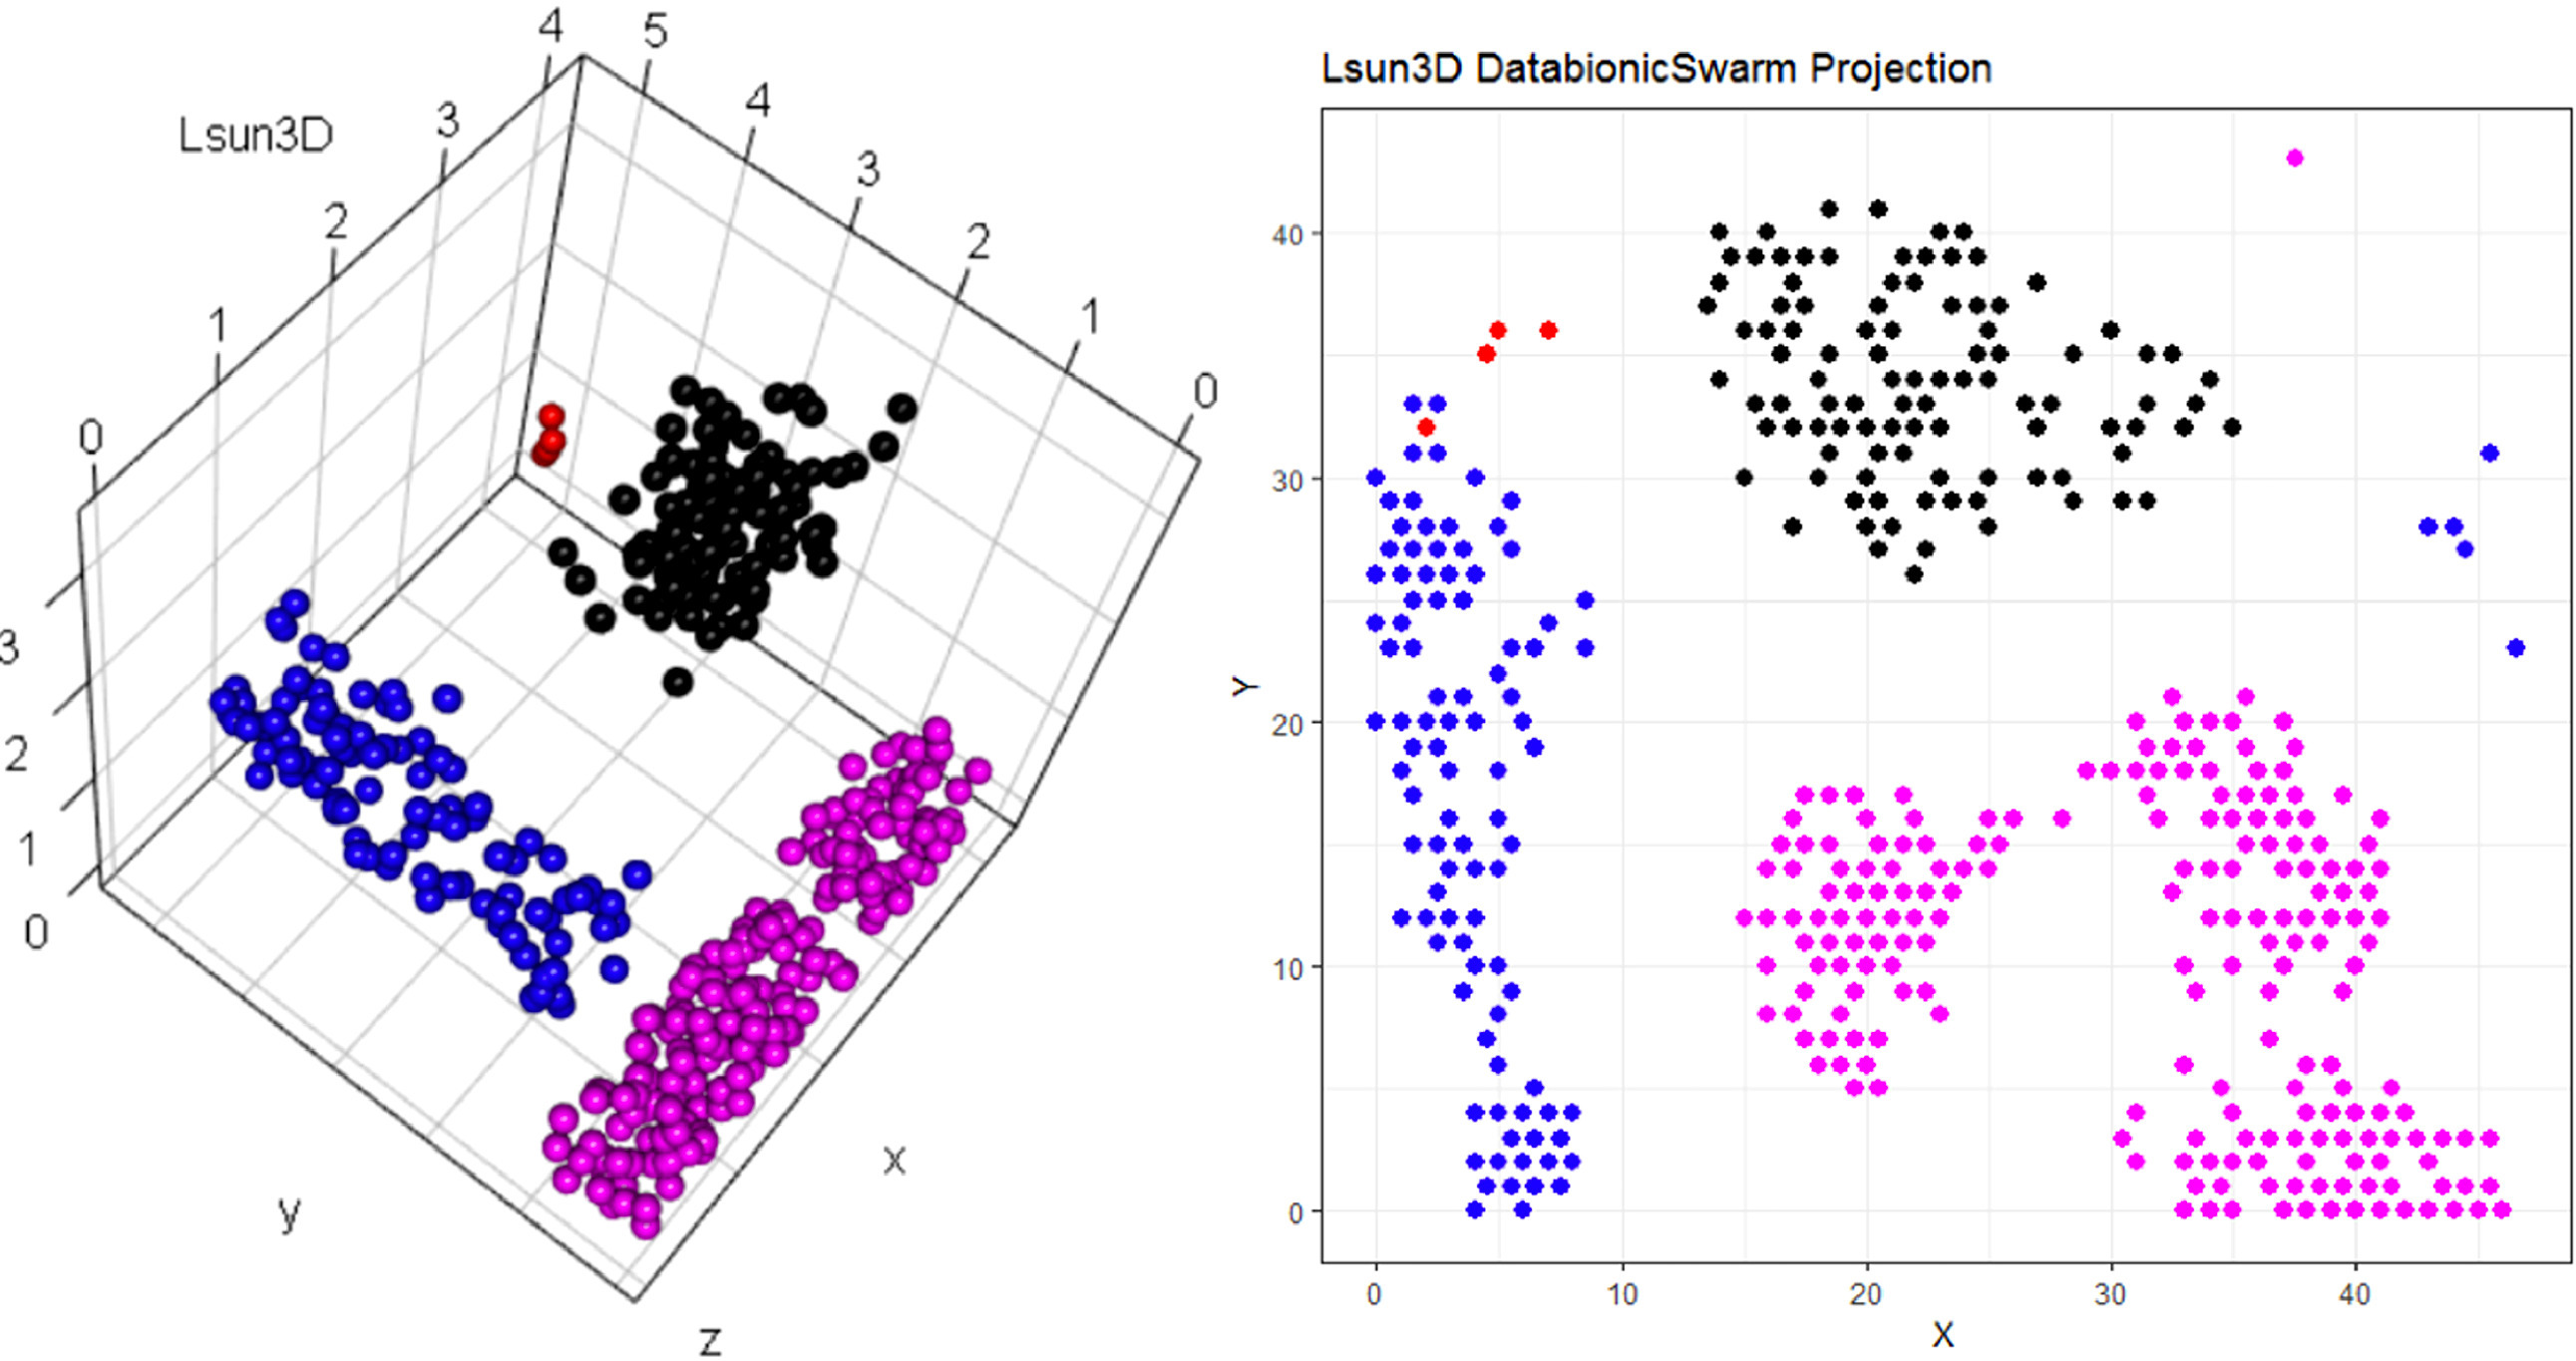

Low-Dimensional Space (2D): Mean Distance = 0.5246, Std Dev = 0.2580
High-Dimensional Space (10D): Mean Distance = 1.2713, Std Dev = 0.2741
PCA-Reduced High-Dimensional Space (2D): Mean Distance = 0.6167, Std Dev = 0.3020
Low-D Space Std/Mean Ratio: 0.4918
High-D Space Std/Mean Ratio: 0.2156
PCA-Reduced Space Std/Mean Ratio: 0.4898


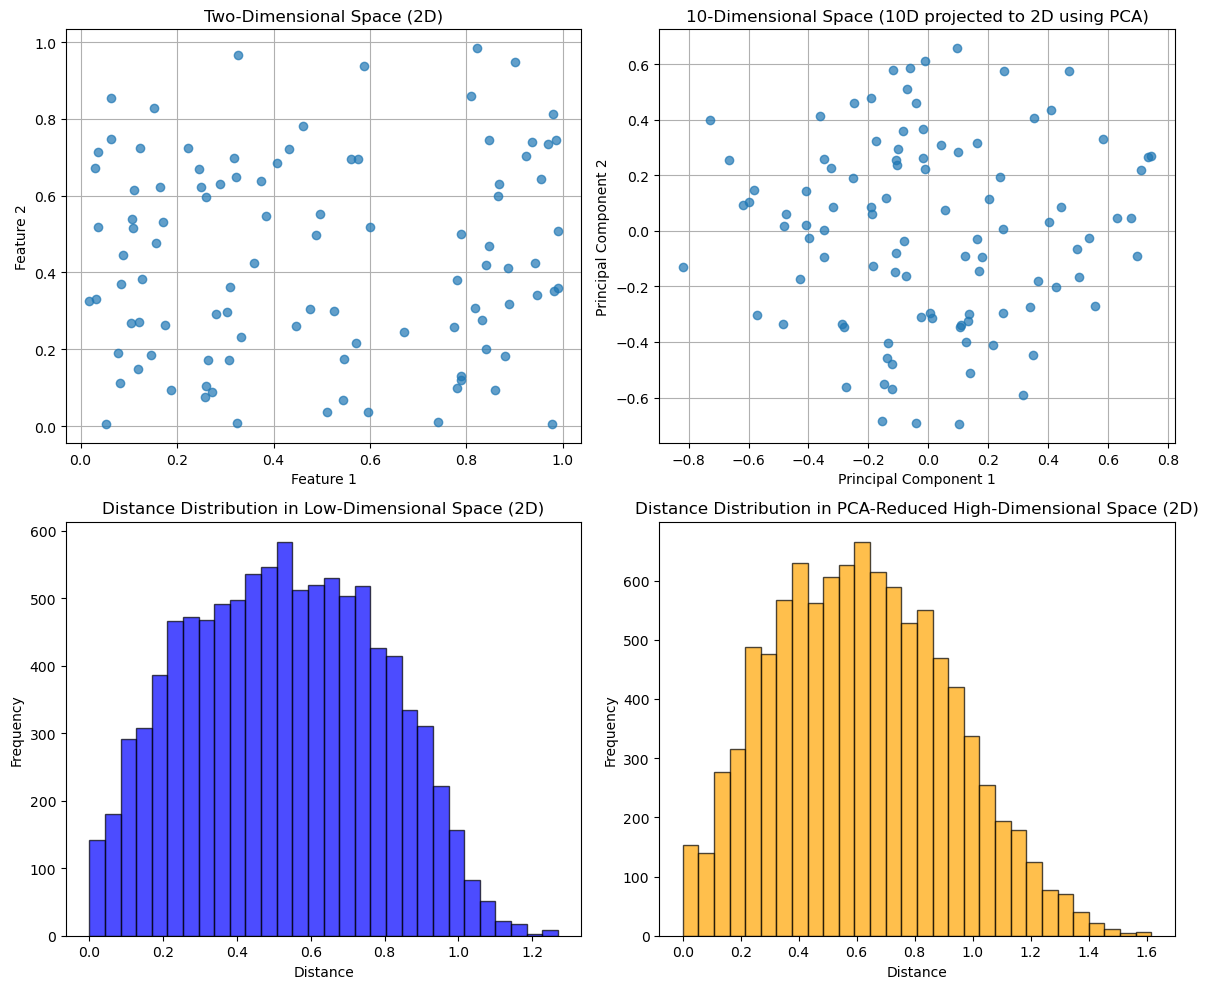

In [417]:
# Function to generate random data
def generate_data(n_samples, n_features):
    return np.random.rand(n_samples, n_features)

# 2D-dimensional data
low_dim_data = generate_data(100, 2)

# 10D-dimensional data
high_dim_data = generate_data(100, 10)

# Calculate pairwise distances for low-dimensional data
low_dim_distances = pairwise_distances(low_dim_data)

# Calculate pairwise distances for high-dimensional data
high_dim_distances = pairwise_distances(high_dim_data)

# Use PCA to reduce high-dimensional data to 2D for visualization
pca = PCA(n_components=2)
high_dim_data_2d = pca.fit_transform(high_dim_data)

# Calculate pairwise distances for the PCA-reduced high-dimensional data
pca_distances = pairwise_distances(high_dim_data_2d)

# Mean and standard deviation of distances
mean_low_dim = np.mean(low_dim_distances)
std_low_dim = np.std(low_dim_distances)

mean_high_dim = np.mean(high_dim_distances)
std_high_dim = np.std(high_dim_distances)

mean_pca = np.mean(pca_distances)
std_pca = np.std(pca_distances)

# Results
print(f'Low-Dimensional Space (2D): Mean Distance = {mean_low_dim:.4f}, Std Dev = {std_low_dim:.4f}')
print(f'High-Dimensional Space (10D): Mean Distance = {mean_high_dim:.4f}, Std Dev = {std_high_dim:.4f}')
print(f'PCA-Reduced High-Dimensional Space (2D): Mean Distance = {mean_pca:.4f}, Std Dev = {std_pca:.4f}')
print(f"Low-D Space Std/Mean Ratio: {std_low_dim / mean_low_dim:.4f}")
print(f"High-D Space Std/Mean Ratio: {std_high_dim / mean_high_dim:.4f}")
print(f"PCA-Reduced Space Std/Mean Ratio: {std_pca / mean_pca:.4f}")


# Plots
plt.figure(figsize=(12, 10))

# 1. 2-Dimensional Scatter Plot
plt.subplot(2, 2, 1)
plt.scatter(low_dim_data[:, 0], low_dim_data[:, 1], alpha=0.7)
plt.title('Two-Dimensional Space (2D)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()

# 2. 10-Dimensional Scatter Plot (PCA)
plt.subplot(2, 2, 2)
plt.scatter(high_dim_data_2d[:, 0], high_dim_data_2d[:, 1], alpha=0.7)
plt.title('10-Dimensional Space (10D projected to 2D using PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()

# 3. Histogram of Distances in Low-Dimensional Space
plt.subplot(2, 2, 3)
plt.hist(low_dim_distances.flatten(), bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distance Distribution in Low-Dimensional Space (2D)')
plt.xlabel('Distance')
plt.ylabel('Frequency')

# 4. Histogram of Distances in PCA-Reduced High-Dimensional Space
plt.subplot(2, 2, 4)
plt.hist(pca_distances.flatten(), bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.title('Distance Distribution in PCA-Reduced High-Dimensional Space (2D)')
plt.xlabel('Distance')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In high-dimensional space, distances between points become very similar. Our results show that pairwise distances in 10D are more concentrated around the mean compared to 2D. Even after reducing dimensions with PCA, the original geometry is distorted, showing how high dimensionality affects both distance and data structure, which is a key aspect of the curse of dimensionality.

### **Results**
As a geoscience student working with big and complex datasets, we have explored the challenges introduced by high-dimensional data, commonly referred to as the curse of dimensionality. In this project, we focused on how increasing the number of features affects machine learning models. Through practical case studies, I demonstrated several key issues that arise in high-dimensional spaces: reduced classifier performance, difficulties in visualization, overfitting, and distortion in the feature space.

1. Classifier Performance: As the number of dimensions rises, the performance of classifiers may decline, making it challenging to predict outcomes accurately.
2. Difficulties in Visualization: Visualizing data in high-dimensional spaces becomes increasingly complex, making it challenging to interpret and analyze the relationships between features.
3. Overfitting Issues: With a high number of features, models may become overly complex, fitting the training data too closely and failing to generalize well to new data set.
4. Distorted Feature Space: The relationships between features can become distorted in high-dimensional spaces resulting in the more complex understanding of data patterns and structures.

I hesitated to discuss ways to address these issues to keep the focus of this work narrow, but I would like to briefly highlight a few, such as careful feature selection based on expert knowledge or feature ranking (especially if your domain knowledge is limited), regularization, and cross-validation.

I hope this project will help you having better understanding the limitations of high-dimensional data and the importance of applying dimensionality reduction or feature selection techniques in geoscience-related machine learning tasks.

### **References**

1. https://builtin.com/data-science/curse-dimensionality
2. https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html
3. https://vtiya.medium.com/the-relationship-between-high-dimensionality-and-overfitting-5bca0967b60f
4. https://www.sciencedirect.com/science/article/pii/S2215016120303137#fig0001

### **Disclaimer**

In this research, some AI tools (ChatGPT, BlackboxAI) are used while creating and debugging codes.

#### About Burak Firat
Bs in Petroleum Engineering, Istanbul Technical University, 2017
Ms in Petroleum and Geosystems Engineering, University of Texas at Austin, 2022
PhD student at Hildebrand Department of Petroleum and Geosystems Engineering, University of Texas at Austin

Feel free to contact me about this workflow.

Sincerely,
Burak Firat

#### About the Supervising Professor

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).